<a href="https://colab.research.google.com/github/Yova-DL/Active-Learning/blob/master/model_TPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
import tensorflow as tf

import os

In [0]:
# dimensions of our images.
img_width, img_height = 128, 128

train_data_dir = '/content/gdrive/My Drive/data/train'
validation_data_dir = '/content/gdrive/My Drive/data/validation'
nb_train_samples = 2051
nb_validation_samples = 1127
epochs = 20
batch_size = 150
learning_rate = 0.001

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [0]:
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (5, 5),input_shape=input_shape, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

#model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

#model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(120))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 64, 64, 128)       204928    
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 256)       819456    
__________

In [0]:
"""model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(120))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()"""

In [0]:
import os
import pprint
import tensorflow as tf
try:
    device_name = os.environ['COLAB_TPU_ADDR']
    TPU_ADDRESS = 'grpc://' + device_name
    print('Found TPU at: {}'.format(TPU_ADDRESS))

except KeyError:
    print('TPU not found')

Found TPU at: grpc://10.121.53.50:8470


In [0]:
import os
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)

INFO:tensorflow:Querying Tensorflow master (grpc://10.121.53.50:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 1602933831699297956)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 9865927338885245100)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 6498742636253750920)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 17574813446661927591)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 3571871047653749089)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/

In [0]:

tpu_model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss=tf.keras.losses.categorical_crossentropy,#tf.keras.losses.categorical_crossentropy,
    metrics=[tf.keras.metrics.categorical_crossentropy],#['categorical_accuracy']
)

In [0]:
tpu_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35_input (InputLayer) (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 64, 64, 128)       204928    
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 32, 32, 128)       0         
__________

Visualiser le modèle

In [0]:
import keras
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

keras.utils.vis_utils.pydot = pyd

#Visualize Model

def visualize_model(model):
    return SVG(model_to_dot(model).create(prog='dot', format='svg'))
#create your model
#then call the function on your model
visualize_model(tpu_model)

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')#binary ,categorical

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 2051 images belonging to 120 classes.
Found 1127 images belonging to 120 classes.


In [0]:
model_fit=tpu_model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
   
)

Epoch 1/20
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(18,), dtype=tf.int32, name='core_id_60'), TensorSpec(shape=(18, 128, 128, 3), dtype=tf.float32, name='conv2d_35_input_10'), TensorSpec(shape=(18, 120), dtype=tf.float32, name='activation_32_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for conv2d_35_input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 7.185805082321167 secs
INFO:tensorflow:Setting weights on TPU model.
 3/14 [=====>........................] - ETA: 1:02 - loss: 7.7054 - categorical_crossentropy: 7.7054INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(12,), dtype=tf.int32, name='core_id_60'), TensorSpec(shape=(12, 128, 128, 3), dtype=tf.float32, name='conv2d_35_input_10'), TensorSpec(shape=(12, 120), dtype=tf.float32, name='activation_32_target_10')]
INFO:tensorflow:Overriding defau

In [0]:
score = tpu_model.evaluate_generator(validation_generator, nb_validation_samples/batch_size, workers=12)

In [0]:
print("Erreur: ", 100*score[0],"%") 
print("Précision: ",100* score[1],"%")

Erreur:  478.7712633609772 %
Précision:  478.7717819213867 %


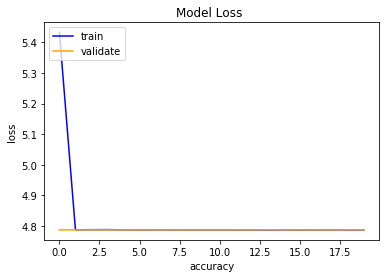

In [0]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['loss'], 'blue')
plt.plot(model_fit.history['val_loss'], 'orange')
plt.title('Model Loss ')
plt.ylabel('loss')
plt.xlabel('accuracy')
plt.savefig('/content/gdrive/My Drive/data/model_loss_tpu')
plt.legend(['train', 'validate'], loc='upper left')

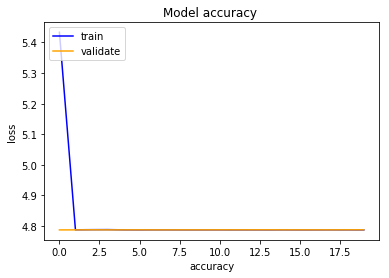

In [0]:
plt.plot(model_fit.history['categorical_crossentropy'], 'blue')
plt.plot(model_fit.history['val_categorical_crossentropy'], 'orange')
plt.title('Model accuracy ')
plt.ylabel('loss')
plt.xlabel('accuracy')
plt.legend(['train', 'validate'], loc='upper left')
plt.savefig('/content/gdrive/My Drive/data/model_loss_tpu')
plt.legend(['train', 'validate'], loc='upper left')

In [0]:
from livelossplot import PlotLossesKeras
model_fit=tpu_model.fit_generator(train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[PlotLossesKeras()],
    verbose=0,
)